In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
data = pd.read_csv('Admission.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
data.shape

(400, 9)

In [4]:
data.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


#### For filling null values
data['University Rating'] = data['University Rating].fillna(data['University Rating].mode()[0])

In [6]:
data = data.drop(columns = ['Serial No.'])
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


C:\Users\Nasheed\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Nasheed\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Nasheed\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

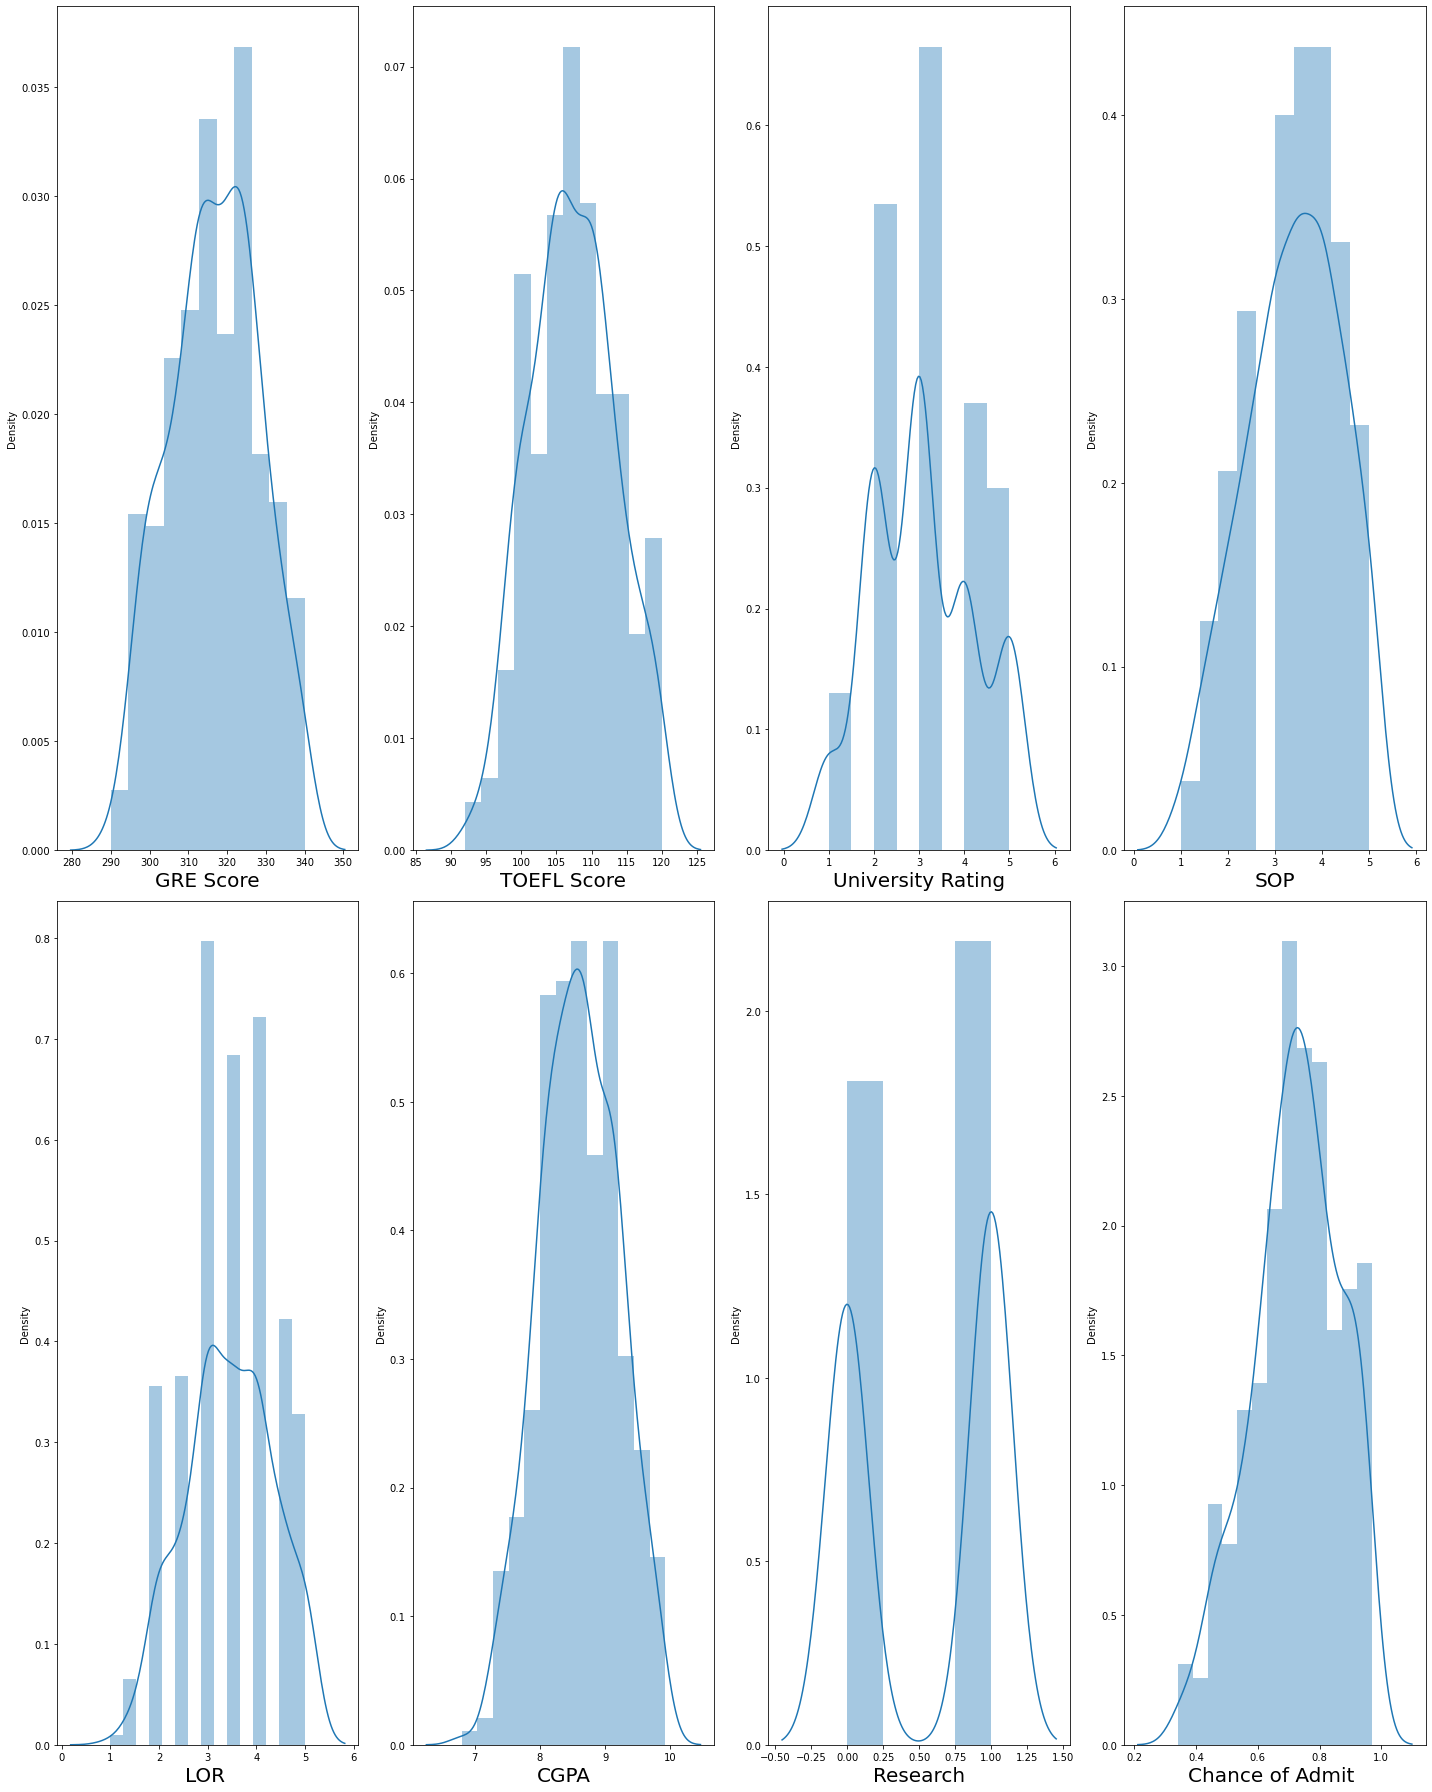

In [7]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=16:
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [8]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
#Divide dataset into features and label
y = data['Chance of Admit ']
X = data.drop(columns=['Chance of Admit '])

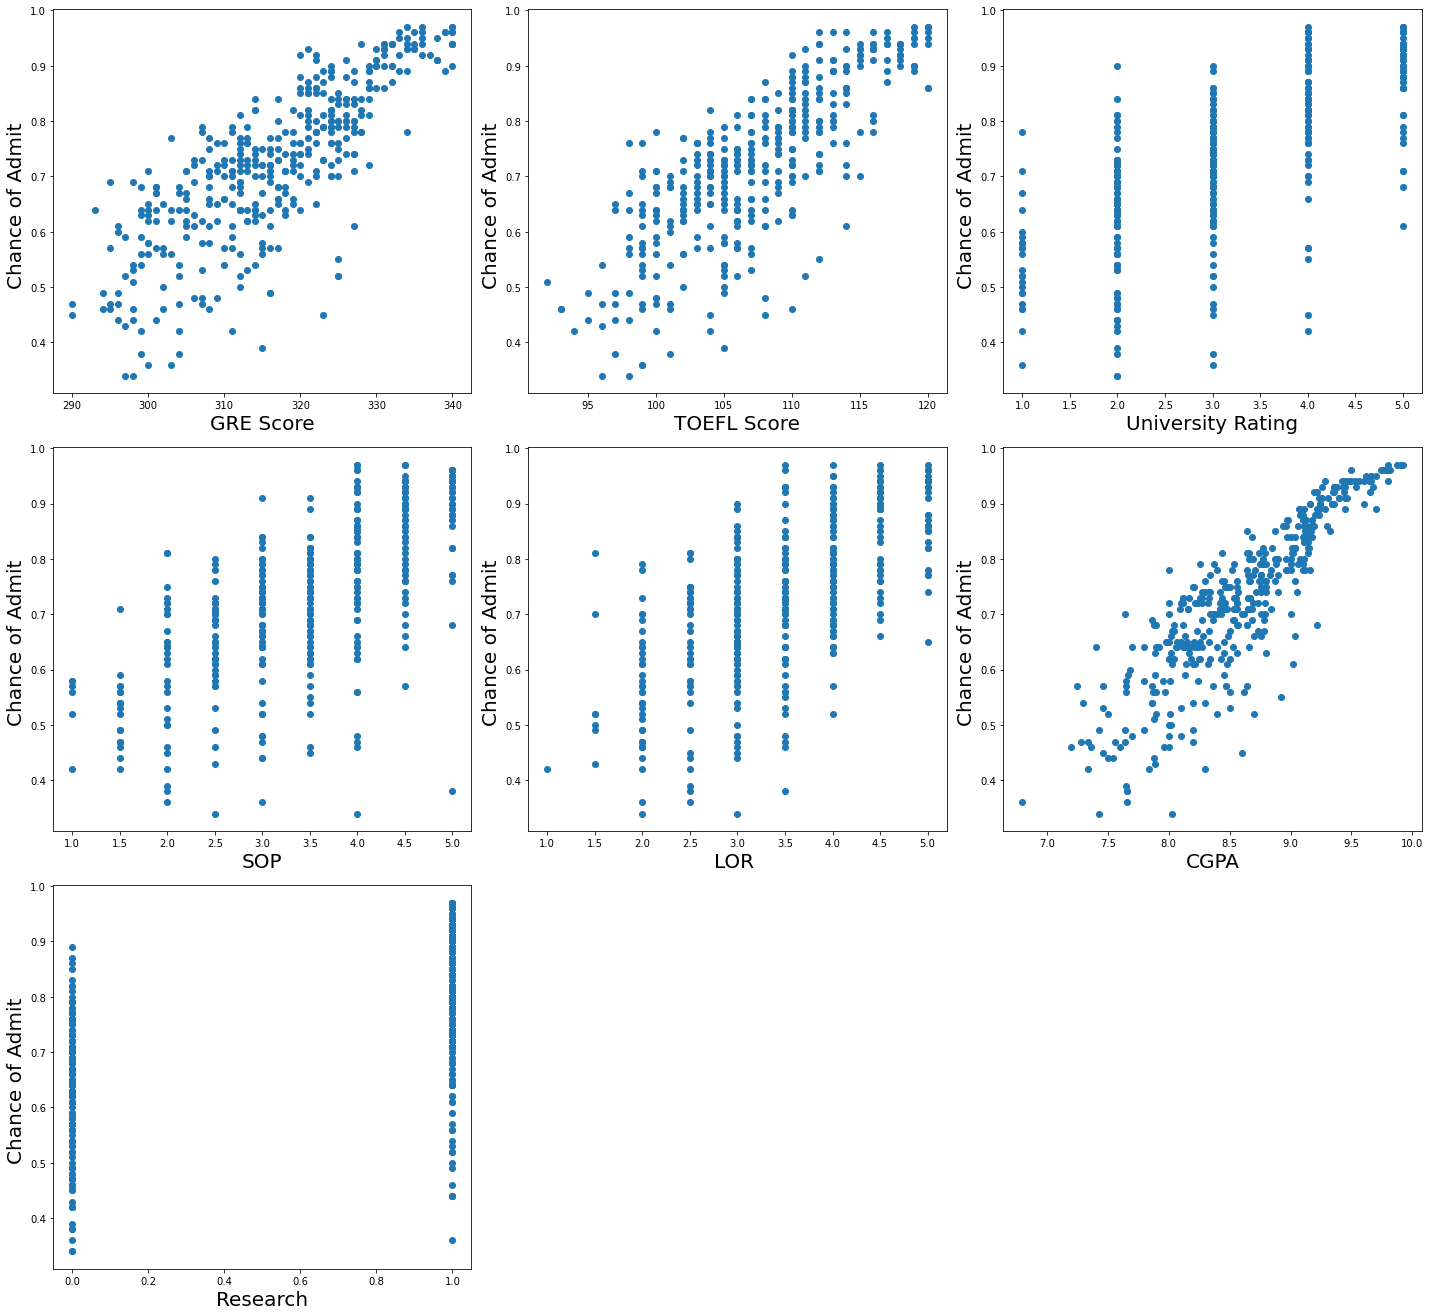

In [10]:
#visualising relationship
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit ',fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [11]:
#Data scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
X_scaled

array([[ 1.76210664,  1.74697064,  0.79882862, ...,  1.16732114,
         1.76481828,  0.90911166],
       [ 0.62765641, -0.06763531,  0.79882862, ...,  1.16732114,
         0.45515126,  0.90911166],
       [-0.07046681, -0.56252785, -0.07660001, ...,  0.05293342,
        -1.00563118,  0.90911166],
       ...,
       [ 1.15124883,  1.41704229,  0.79882862, ...,  1.16732114,
         1.42900622,  0.90911166],
       [-0.41952842, -0.72749202, -0.07660001, ...,  0.61012728,
         0.30403584, -1.09997489],
       [ 1.41304503,  1.58200646,  0.79882862, ...,  0.61012728,
         1.78160888,  0.90911166]])

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 21)
y_train.head() #data selection depends on random number

145    0.81
216    0.91
377    0.47
176    0.90
91     0.38
Name: Chance of Admit , dtype: float64

### Model instantiating and training

In [14]:
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

#### Predict the chance of admission given features

In [15]:
data.tail(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
398,312,103,3,3.5,4.0,8.78,0,0.67
399,333,117,4,5.0,4.0,9.66,1,0.95


In [17]:
print('Chance of admission is: ', regression.predict(scaler.transform([[312, 103, 3, 3.5, 4.0, 8.78, 0]])))

Chance of admission is:  [0.72357652]


#### You can save the model and later use it for prediction

In [19]:
#saving the model to the local file system
filename = 'finalized_admission_model.pickle'
pickle.dump(regression, open(filename, 'wb'))

#prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))
a = loaded_model.predict(scaler.transform([[314, 103, 2, 2, 3, 8.21, 0]]))
a

array([0.63746075])

In [20]:
#Adjusted R2 square
regression.score(x_train, y_train)

0.8223222312555013

#### Lets check how well the model fits the test data

In [21]:
regression.score(x_test, y_test)

0.7494296152013957

#### Lets plot and visualise

In [22]:
y_pred = regression.predict(x_test)
y_pred

array([0.860894  , 0.72008416, 0.61915859, 0.60291959, 0.5382893 ,
       0.77576964, 0.58478419, 0.71901164, 0.43310974, 0.53284352,
       0.63383685, 0.80287261, 0.64228063, 0.84008888, 0.55745526,
       0.685145  , 0.9377372 , 0.71498801, 0.65506279, 0.83086186,
       0.78377495, 0.660185  , 0.78342462, 0.61691263, 0.77767698,
       0.75679549, 0.84057801, 0.70938271, 0.94211979, 0.80830659,
       0.87568721, 0.63919255, 0.8470931 , 0.60797196, 0.76443429,
       0.90662467, 0.7883998 , 0.58683347, 0.57039269, 0.65429668,
       0.80742367, 0.83598377, 0.95420723, 0.59731507, 0.81984874,
       0.88891061, 0.79333581, 0.67848959, 0.73151721, 0.51956449,
       0.70644135, 0.96455383, 0.96314878, 0.63027033, 0.61818413,
       0.51276731, 0.60030817, 0.52354018, 0.88135681, 0.56464609,
       0.7033718 , 0.78638382, 0.73271531, 0.62239515, 0.78370067,
       0.6745189 , 0.78753743, 0.63511281, 0.85362892, 0.5991834 ,
       0.88980897, 0.56630256, 0.73765542, 0.73001117, 0.94324

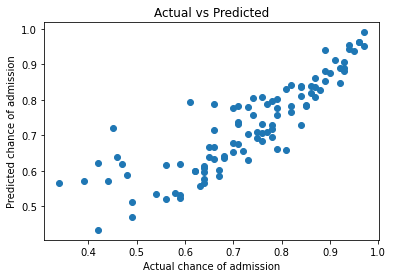

In [23]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual chance of admission')
plt.ylabel('Predicted chance of admission')
plt.title('Actual vs Predicted')
plt.show()

#### Model Evaluation

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [25]:
y_pred = regression.predict(x_test)

In [26]:
mean_absolute_error(y_test, y_pred)

0.05409836240878987

In [27]:
mean_squared_error(y_test, y_pred)

0.0055210578358370534

In [28]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.07430382113886912

### Regularization

Lets see if our model is overfitting or not

In [30]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

#### Lasso Regression

In [31]:
#LassoCV will return best alpha after max iteration
#Normalize is subtracting the mean and dividing by L2-norm
lasscv = LassoCV(alphas = None, max_iter = 1000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(normalize=True)

In [32]:
#best alpha parameter
alpha = lasscv.alpha_
alpha

3.321923782986886e-05

In [33]:
#Now that we have best parameter, Lets use Lasso regression and see how well our data has fitted before
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=3.321923782986886e-05)

In [34]:
lasso_reg.score(x_test, y_test)

0.7493416246046675

#### Ridge Regression

In [39]:
#RidgeCV will return best alpha and coefficients after performing 10 cross validations
ridgecv = RidgeCV(alphas = np.arange(0.001, 0.1, 0.01), normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [40]:
#best alpha parameter
ridgecv.alpha_

0.020999999999999998

In [41]:
ridge_model = Ridge(alpha = ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.020999999999999998)

In [42]:
ridge_model.score(x_test, y_test)

0.7494272488002561

We got same R2 score after using Ridge also. So its not overfitting model.